In [26]:
import pandas as pd
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
import datashader as ds
import colorcet as cc
import folium

from collections import defaultdict, OrderedDict
from folium.plugins import HeatMapWithTime
from datetime import datetime

In [27]:
files=os.listdir(r'C:\DAB_103_project\uber-pickups-in-new-york-city')[-7:]
files

['uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-janjune-15.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv']

In [28]:
files.remove('uber-raw-data-janjune-15.csv')


In [29]:
files

['uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv']

In [30]:
final=pd.DataFrame()
path=r'C:\DAB_103_project\uber-pickups-in-new-york-city'
for file in files:
    df=pd.read_csv(path+"/"+file,encoding='utf-8')
    final=pd.concat([df,final])

In [31]:
final.shape

(4534327, 4)

In [32]:
df=final.copy()

In [33]:
df.head()

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512


In [34]:
df.tail()

,Date/Time,Lat,Lon,Base
564511,4/30/2014 23:22:00,40.7640,-73.9744,B02764
564512,4/30/2014 23:26:00,40.7629,-73.9672,B02764
564513,4/30/2014 23:31:00,40.7443,-73.9889,B02764
564514,4/30/2014 23:32:00,40.6756,-73.9405,B02764
564515,4/30/2014 23:48:00,40.6880,-73.9608,B02764


In [35]:
df.dtypes

Date/Time     object
Lat          float64
Lon          float64
Base          object
dtype: object

In [36]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'], format="%m/%d/%Y %H:%M:%S")

In [37]:
df.dtypes

Date/Time    datetime64[ns]
Lat                 float64
Lon                 float64
Base                 object
dtype: object

In [38]:
df.head()

,Date/Time,Lat,Lon,Base
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512


In [39]:
df['weekday']=df['Date/Time'].dt.day_name()
df['day']=df['Date/Time'].dt.day
df['minute']=df['Date/Time'].dt.minute
df['month']=df['Date/Time'].dt.month
df['hour']=df['Date/Time'].dt.hour

In [40]:
df.dtypes

Date/Time    datetime64[ns]
Lat                 float64
Lon                 float64
Base                 object
weekday              object
day                   int64
minute                int64
month                 int64
hour                  int64
dtype: object

In [41]:
df.isnull().sum()

Date/Time    0
Lat          0
Lon          0
Base         0
weekday      0
day          0
minute       0
month        0
hour         0
dtype: int64

In [42]:
df['Base'].unique()

array(['B02512', 'B02598', 'B02617', 'B02682', 'B02764'], dtype=object)

In [43]:
df['day'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
      dtype=int64)

In [44]:
df['weekday'].unique()


array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4534327 entries, 0 to 564515
Data columns (total 9 columns):
 #   Column     Dtype         
---  ------     -----         
 0   Date/Time  datetime64[ns]
 1   Lat        float64       
 2   Lon        float64       
 3   Base       object        
 4   weekday    object        
 5   day        int64         
 6   minute     int64         
 7   month      int64         
 8   hour       int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(2)
memory usage: 345.9+ MB


In [46]:
df.describe()

,Lat,Lon,day,minute,month,hour
count,4.534327e+06,4.534327e+06,4.534327e+06,4.534327e+06,4.534327e+06,4.534327e+06
mean,4.073926e+01,-7.397302e+01,1.594337e+01,2.940071e+01,6.828703e+00,1.421831e+01
std,3.994991e-02,5.726670e-02,8.744902e+00,1.732238e+01,1.703810e+00,5.958759e+00
min,3.965690e+01,-7.492900e+01,1.000000e+00,0.000000e+00,4.000000e+00,0.000000e+00
25%,4.072110e+01,-7.399650e+01,9.000000e+00,1.400000e+01,5.000000e+00,1.000000e+01
50%,4.074220e+01,-7.398340e+01,1.600000e+01,2.900000e+01,7.000000e+00,1.500000e+01
75%,4.076100e+01,-7.396530e+01,2.300000e+01,4.400000e+01,8.000000e+00,1.900000e+01
max,4.211660e+01,-7.206660e+01,3.100000e+01,5.900000e+01,9.000000e+00,2.300000e+01


In [47]:
!pip install plotly

''

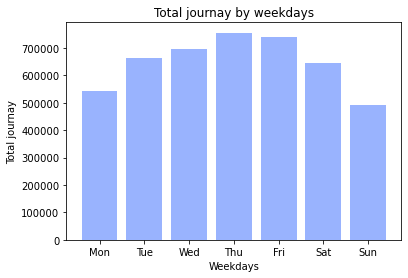

In [48]:
plt.hist(df.weekday, bins=7, range =(-.5,6.5), rwidth=.8, color='#0041FD', alpha=.4,)
plt.xticks(range(7), 'Mon Tue Wed Thu Fri Sat Sun'.split())
plt.xlabel('Weekdays')
plt.ylabel('Total journay')
plt.title('Total journay by weekdays')
;

Number of Pickups: 4500872


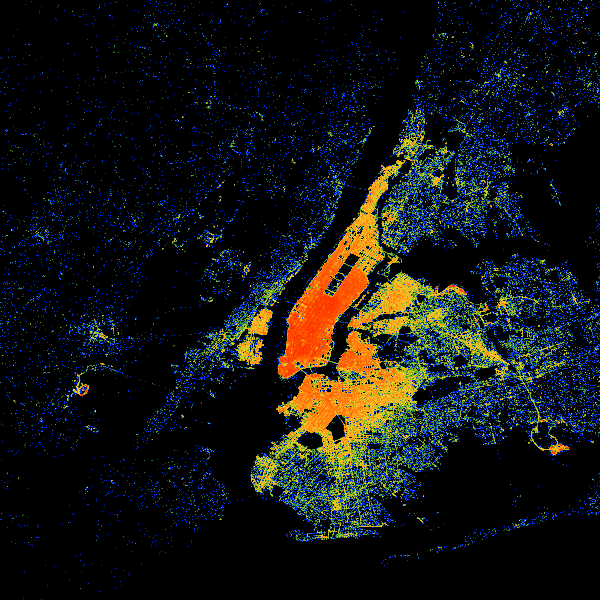

In [49]:
df = df[
    df['Lon'].between(-74.25, -73.75) & 
    df['Lat'].between(40.5, 41)
]
print('Number of Pickups: {}'.format(len(df)))

pickup_points = ds.Canvas().points(df, 'Lon', 'Lat', )
ds.tf.set_background(ds.tf.shade(pickup_points, cmap=cc.b_rainbow_bgyr_35_85_c72), "black")

In [50]:
df.head()

,Date/Time,Lat,Lon,Base,weekday,day,minute,month,hour
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,Monday,1,1,9,0
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,Monday,1,3,9,0
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,Monday,1,6,9,0
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,Monday,1,11,9,0
5,2014-09-01 00:12:00,40.6735,-73.9918,B02512,Monday,1,12,9,0


In [51]:
uber_15=pd.read_csv(r'C:\DAB_103_project\uber-pickups-in-new-york-city\uber-raw-data-janjune-15.csv', encoding='utf-8')
uber_15.head()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,B02617,2015-05-17 09:47:00,B02617,141
1,B02617,2015-05-17 09:47:00,B02617,65
2,B02617,2015-05-17 09:47:00,B02617,100
3,B02617,2015-05-17 09:47:00,B02774,80
4,B02617,2015-05-17 09:47:00,B02617,90


In [52]:
uber_15.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14270479 entries, 0 to 14270478
Data columns (total 4 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   Dispatching_base_num  object
 1   Pickup_date           object
 2   Affiliated_base_num   object
 3   locationID            int64 
dtypes: int64(1), object(3)
memory usage: 435.5+ MB


In [53]:
uber_15.isnull().sum()

Dispatching_base_num         0
Pickup_date                  0
Affiliated_base_num     162195
locationID                   0
dtype: int64

In [54]:
#### remove null values

In [55]:
uber=uber_15[uber_15['Affiliated_base_num'].notna()]

In [56]:
uber.isnull().sum()

Dispatching_base_num    0
Pickup_date             0
Affiliated_base_num     0
locationID              0
dtype: int64

In [57]:
uber['Pickup_date'].min()

'2015-01-01 00:00:05'

In [58]:
uber['Pickup_date'].max()

'2015-06-30 23:59:00'

In [ ]:
uber_15['Pickup_date'] =  pd.to_datetime(uber_15['Pickup_date'], format='%Y-%m-%d %H:%M:%S')

In [ ]:
uber_15['weekday']=uber_15['Pickup_date'].dt.day_name()
uber_15['day']=uber_15['Pickup_date'].dt.day
uber_15['minute']=uber_15['Pickup_date'].dt.minute
uber_15['month']=uber_15['Pickup_date'].dt.month
uber_15['hour']=uber_15['Pickup_date'].dt.hour

In [ ]:
uber_15.head()

In [ ]:
df.Base.value_counts()

In [ ]:
base_names = {"Base": {'B02617':'Weiter', 'B02598':'Hinter','B02682':'Schmecken','B02764':'Danach-NY','B02512':'Unter'}}
df =df.copy()
df.replace(base_names, inplace=True)
df.head()

In [ ]:
import plotly.express as px
# Here we use a column of categorical data
fig = px.histogram(df, x="Base",
                  title='Pickups Per Base',
                   labels={'count':'No of Pickups'})
fig.show()

In [ ]:
uber_foil=pd.read_csv(r'C:\DAB_103_project\uber-pickups-in-new-york-city/Uber-Jan-Feb-FOIL.csv')

In [ ]:
uber_foil.head()

In [ ]:
uber_foil.info()

In [ ]:
uber_foil.isnull().sum()

In [ ]:
uber_foil['dispatching_base_number'].unique()

In [ ]:
sns.boxplot(x = 'dispatching_base_number', y = 'active_vehicles', data = uber_foil,)